In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("roads_data_processed_1503.csv")
df

,road,id,model_type,condition,name,lat,lon,length,type
0,N1,0,SourceSink,NaN,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,814.0,Others
1,N1,1,Link,NaN,Box Culvert,23.702917,90.450417,8.0,Culvert
2,N1,2,Link,NaN,Intersection with Z1101,23.702778,90.450472,178.0,CrossRoad
3,N1,3,Link,NaN,Km post missing,23.702139,90.451972,1000.0,KmPost
4,N1,4,Bridge,A,.,23.698739,90.458861,11.3,Box Culvert
...,...,...,...,...,...,...,...,...,...
7922,Z2013,7922,Link,NaN,Culvert,24.667222,91.827249,208.0,Culvert
7923,Z2013,7923,Link,NaN,Culvert,24.666250,91.825527,193.0,Culvert
7924,Z2013,7924,Link,NaN,Culvert,24.664722,91.825305,455.0,Culvert
7925,Z2013,7925,Link,NaN,Balaganj 1 km,24.662306,91.827833,575.0,KmPost


In [3]:
all_id_pairs_and_weights = []
all_nodes = set()

roads = df.road.unique()
df_objects_all = []
for road in roads:
    df_objects_on_road = df[df['road'] == road]
    df_objects_on_road.reset_index(inplace=True, drop=True)
    #print(df_objects_on_road)
    path_length_list = []
    id_list = []
    road_pair_list = []
    startindex = 0
    partial_path_length = 0

    for index, row in df_objects_on_road.iterrows():
        #partial_path_length += int(row['length'])
        if (row['model_type'] == "SourceSink") or (row['model_type'] == "Intersection"):
            id_list.append(row['id'])
            all_nodes.add(row['id'])
            if startindex > 0:
                path_length_list.append(partial_path_length)
                partial_path_length = 0
            startindex +=1
        partial_path_length += int(row['length'])
    for i in range(len(id_list)-1):
        id_pair = (id_list[i],id_list[i+1], path_length_list[i])
        print(id_pair)
        road_pair_list.append(id_pair)    
        all_id_pairs_and_weights.append(id_pair)
    print("for", road, "the list of the path length is", road_pair_list)

all_nodes = list(all_nodes)
print("the list containing all nodes", all_nodes, "contains", len(all_nodes), "nodes")
print("the list containing all id pairs and weights", all_id_pairs_and_weights, "contains", len(all_id_pairs_and_weights), "tuples")

(0, 20, 9177)
(20, 38, 3226)
(38, 164, 36975)
(164, 169, 1905)
(169, 191, 8318)
(191, 251, 26432)
(251, 393, 46537)
(393, 437, 10945)
(437, 454, 6545)
(454, 463, 3926)
(463, 500, 18912)
(500, 817, 82127)
(817, 877, 16543)
(877, 1094, 53204)
(1094, 1172, 21645)
(1172, 1966, 127989)
for N1 the list of the path length is [(0, 20, 9177), (20, 38, 3226), (38, 164, 36975), (164, 169, 1905), (169, 191, 8318), (191, 251, 26432), (251, 393, 46537), (393, 437, 10945), (437, 454, 6545), (454, 463, 3926), (463, 500, 18912), (500, 817, 82127), (817, 877, 16543), (877, 1094, 53204), (1094, 1172, 21645), (1172, 1966, 127989)]
(251, 2219, 65780)
(2219, 2937, 18399)
for N102 the list of the path length is [(251, 2219, 65780), (2219, 2937, 18399)]
(2276, 454, 1883)
(454, 2438, 48100)
for N104 the list of the path length is [(2276, 454, 1883), (454, 2438, 48100)]
(38, 2620, 12845)
(2620, 2555, 23848)
(2555, 2600, 12756)
for N105 the list of the path length is [(38, 2620, 12845), (2620, 2555, 23848), (255

57
70


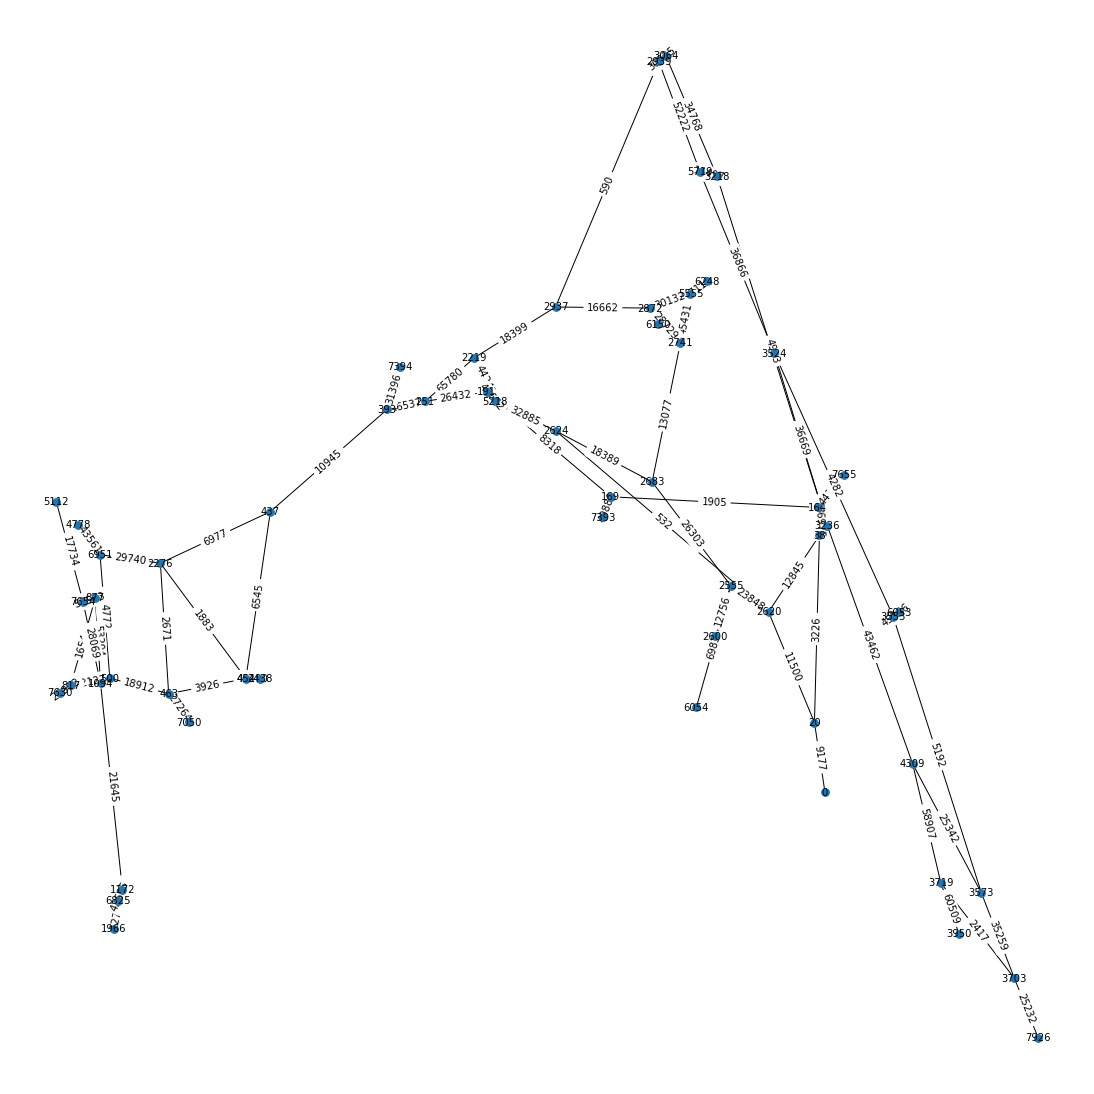

In [6]:
G = nx.Graph()
G.add_nodes_from(all_nodes)
print(G.number_of_nodes())
G.add_weighted_edges_from(all_id_pairs_and_weights)
print(G.number_of_edges())

pos=nx.spring_layout(G)

plt.figure(figsize=(15,15))

# version 2
nx.draw(G,pos,node_size=60,font_size=8)

# specify edge labels explicitly
edge_labels=dict([((u,v,),d['weight'])
for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

nx.draw_networkx_labels(G,pos,font_size=10)

# show graphs

plt.savefig("graph_new.pdf", dpi=1000)
#plt.show()